In [1]:
import pandas as pd
import numpy as np
import random as rnd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
train=pd.read_csv("https://storage.googleapis.com/kaggle-competitions-data/kaggle/3136/train.csv?GoogleAccessId=competitions-data@kaggle-161607.iam.gserviceaccount.com&Expires=1501433097&Signature=YxwZ1P7mrON2PMSn8HowE6pmZrw1Lkfw4y3WYLwUZFkxuMKLRsAW7jv6DOjmPUxW3dgDiC%2Fz39bQO%2B0J3Q%2BmH5FcKrMb6hKSjJu%2FE%2B7OOXxbqTOKYhVx5W4wsKwJP4p4%2Fzf4ro3b4mbsAuka0HSLpRETtD7F%2BU5vj85iTn7LabEG5%2BkNtdxEw8OormmhEEDAOlrjDUndQUH0YVSy%2Bu5xWuTly%2FcRW4jpM8aTmncf8VboXXThyqAVylZT%2FvpPnBJdn1Lju0lEY29wqITmUz0dI4g701frFyURuIZLfecsLOZ7rShH7mTs5RKzNBalJMb2bw4eIyNIqfZWW4fPvnCBLg%3D%3D")
test=pd.read_csv("https://storage.googleapis.com/kaggle-competitions-data/kaggle/3136/test.csv?GoogleAccessId=competitions-data@kaggle-161607.iam.gserviceaccount.com&Expires=1501433172&Signature=E10Axi4n3ZoKtfIaXpdOlGI02wemCqH38WsFWiB1AX6z%2B35EQzwZTfeojAYjvNLeHYx9I4Uq4KQxp9yuNHWAAU1MVbJCDN2K0Fa%2BMYOXH8Ge3UFJm7DF%2BELKLzSueUbJsMOKTEMJZI5WK48iYDejQFbXSvpdX2wsxCUccbn38slPoz4BLCy7f2%2FQihR70yM2BxS9Y%2B0KgAcONA6WDGSrNOAMLp4VH10TsZ1516WPGgkpr8y0pSb5F34NIFELpcqtLdPV%2FVJ%2Bbes9Jek4oELRLi8PkTbBgTZ7zfLQVSFxh10Zwy1mVGiajiI4sqThLCpdcYSnb6Clevz9N7PMT0JcUw%3D%3D")
combine=[train,test]

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
fem=train[train["Sex"]=="female"]

In [5]:
print(fem[fem["Survived"]==1].count())

PassengerId    233
Survived       233
Pclass         233
Name           233
Sex            233
Age            197
SibSp          233
Parch          233
Ticket         233
Fare           233
Cabin           91
Embarked       231
dtype: int64


In [6]:

print(233/891)

0.2615039281705948


In [7]:
train.info()
print("---------"*5)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
---------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non

In [8]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
train.describe(include=["O"])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Slabenoff, Mr. Petco",male,1601,C23 C25 C27,S
freq,1,577,7,4,644


In [10]:
print(577/891)

0.6475869809203143


In [11]:
train[['Pclass','Survived']].groupby('Pclass', as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [12]:
train[["Sex","Survived"]].groupby('Sex',as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [13]:
train[["Embarked","Survived"]].groupby('Embarked',as_index=False).mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


In [14]:
train[["SibSp","Survived"]].groupby('SibSp',as_index=False).mean().sort_values(by='Survived',ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [15]:
train[["Parch","Survived"]].groupby('Parch',as_index=False).mean().sort_values(by='Survived',ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


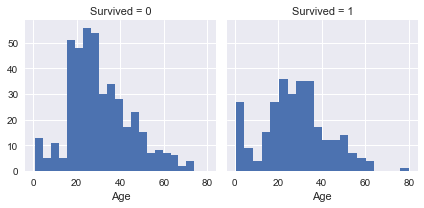

In [16]:
g=sns.FacetGrid(train,col='Survived')
g.map(plt.hist,"Age",bins=20)

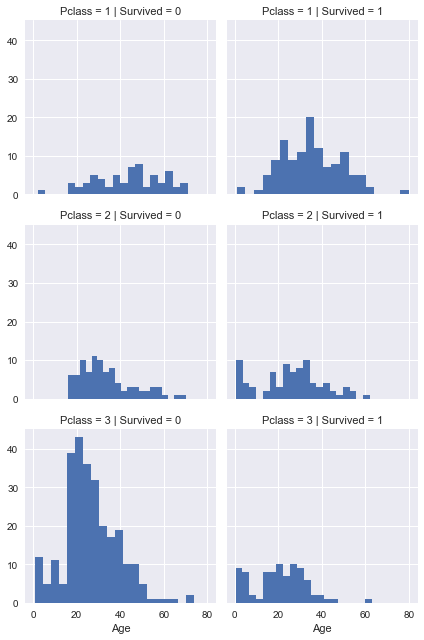

In [17]:
g=sns.FacetGrid(train,col='Survived',row='Pclass')
g.map(plt.hist,"Age",bins=20)

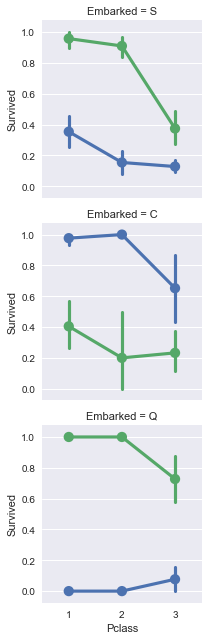

In [18]:
g= sns.FacetGrid(train,row='Embarked')
g.map(sns.pointplot,'Pclass','Survived','Sex',palette='deep')


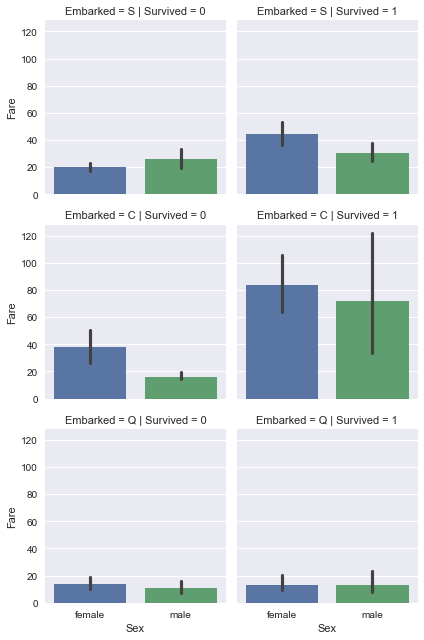

In [19]:
g=sns.FacetGrid(train,row='Embarked',col='Survived')
g.map(sns.barplot,'Sex','Fare',palette="deep")

In [20]:
#avg_train=train["Age"].mean()
#avg_test=test["Age"].mean()
#sd_train=train["Age"].std()
#sd_test=test["Age"].std()
#count_test = test["Age"].isnull().sum()
#count_train=train["Age"].isnull().sum()
#train_age=np.random.randint(avg_train-sd_train,avg_train+sd_train,size=count_train)
#test_age=np.random.randint(avg_test-sd_test,avg_test+sd_test,size=count_test)
#train["Age"][np.isnan(train["Age"])]=train_age
#test["Age"][np.isnan(test["Age"])]=test_age
#train["Age"]=train["Age"].astype(int)
#test["Age"]=test["Age"].astype(int)
#train["Age"].hist(bins=20)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [21]:
train=train.drop(['Cabin','Ticket'],axis=1)
test=test.drop(['Cabin','Ticket'],axis=1)
combine=[train,test]

In [22]:
for dataset in combine:
    dataset['Title']=dataset.Name.str.extract('([A-Za-z]+)\.')
pd.crosstab(train['Title'],train['Sex'])

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  


Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [23]:
for i in combine:
    i['Title']=i['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    i['Title']=i['Title'].replace('Mlle','Miss')
    i['Title']=i['Title'].replace('Mme','Miss')
    i['Title']=i['Title'].replace('Ms','Miss')
train[['Title','Survived']].groupby(['Title'],as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.704301
2,Mr,0.156673
3,Mrs,0.792000
4,Rare,0.347826


In [24]:
dictionary= {"Master":1,"Miss":2,"Mr":3,"Mrs":4,"Rare":5}
for i in combine:
    i['Title']=i['Title'].map(dictionary)
    i['Title']=i['Title'].fillna(0)


In [25]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,4
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,4
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,3


In [26]:
train= train.drop(['Name','PassengerId'],axis=1)
test=test.drop(['Name'],axis=1)
combine=[train,test]

In [27]:
dictionary={"male":0,"female":1}
for i in combine:
    i["Sex"]=i["Sex"].map(dictionary)
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,3
1,1,1,1,38.0,1,0,71.2833,C,4
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,4
4,0,3,0,35.0,0,0,8.0500,S,3


In [28]:
train["Age"]=train["Age"].fillna(train["Age"].mean())
train["Embarked"]=train["Embarked"].fillna("S")


In [29]:
test.describe()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Title
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000,418.000000
mean,1100.500000,2.265550,0.363636,30.272590,0.447368,0.392344,35.627188,2.911483
std,120.810458,0.841838,0.481622,14.181209,0.896760,0.981429,55.907576,0.783102
min,892.000000,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,1.000000
25%,996.250000,1.000000,0.000000,21.000000,0.000000,0.000000,7.895800,3.000000
50%,1100.500000,3.000000,0.000000,27.000000,0.000000,0.000000,14.454200,3.000000
75%,1204.750000,3.000000,1.000000,39.000000,1.000000,0.000000,31.500000,3.000000
max,1309.000000,3.000000,1.000000,76.000000,8.000000,9.000000,512.329200,5.000000


In [30]:
test.describe(include=['O'])

,Embarked
count,418
unique,3
top,S
freq,270


In [31]:
test["Age"]=test["Age"].fillna(test["Age"].mean())
test["Fare"]=test["Fare"].fillna(test["Fare"].median())
combine=[train,test]
test.describe()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Title
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,2.265550,0.363636,30.272590,0.447368,0.392344,35.576535,2.911483
std,120.810458,0.841838,0.481622,12.634534,0.896760,0.981429,55.850103,0.783102
min,892.000000,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,1.000000
25%,996.250000,1.000000,0.000000,23.000000,0.000000,0.000000,7.895800,3.000000
50%,1100.500000,3.000000,0.000000,30.272590,0.000000,0.000000,14.454200,3.000000
75%,1204.750000,3.000000,1.000000,35.750000,1.000000,0.000000,31.471875,3.000000
max,1309.000000,3.000000,1.000000,76.000000,8.000000,9.000000,512.329200,5.000000


In [32]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} )

train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,0,3
1,1,1,1,38.0,1,0,71.2833,1,4
2,1,3,1,26.0,0,0,7.9250,0,2
3,1,1,1,35.0,1,0,53.1000,0,4
4,0,3,0,35.0,0,0,8.0500,0,3


In [33]:
for data in combine:
    data.loc[(data["Age"]<=15),"Age"]=1
    data.loc[(data["Age"]>15) & (data["Age"]<=30),"Age"]=2
    data.loc[(data["Age"]>30) & (data["Age"]<=45),"Age"]=3
    data.loc[(data["Age"]>45) & (data["Age"]<=60),"Age"]=4
    data.loc[(data["Age"]>60),"Age"]=5
    
train.head()
    

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,2.0,1,0,7.2500,0,3
1,1,1,1,3.0,1,0,71.2833,1,4
2,1,3,1,2.0,0,0,7.9250,0,2
3,1,1,1,3.0,1,0,53.1000,0,4
4,0,3,0,3.0,0,0,8.0500,0,3


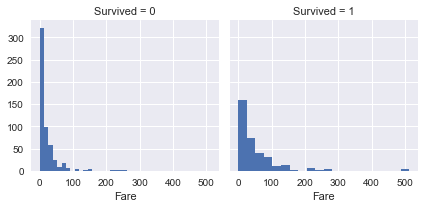

In [34]:
g= sns.FacetGrid(train,col="Survived")
g.map(plt.hist,"Fare",bins=20)

In [35]:
for data in combine:
    data.loc[(data["Fare"]<10),"Fare"]=0
    data.loc[(data["Fare"]>=10) & (data["Fare"]<20),"Fare"]=1
    data.loc[(data["Fare"]>=20) & (data["Fare"]<30),"Fare"]=2
    data.loc[(data["Fare"]>=30),"Fare"]=3
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,2.0,1,0,0.0,0,3
1,1,1,1,3.0,1,0,3.0,1,4
2,1,3,1,2.0,0,0,0.0,0,2
3,1,1,1,3.0,1,0,3.0,0,4
4,0,3,0,3.0,0,0,0.0,0,3


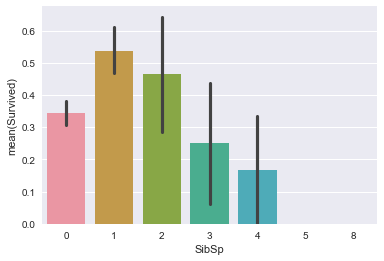

In [36]:
sns.barplot(x="SibSp",y="Survived",data=train)

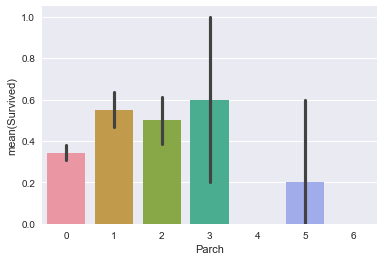

In [37]:
sns.barplot(x="Parch",y="Survived",data=train)

/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


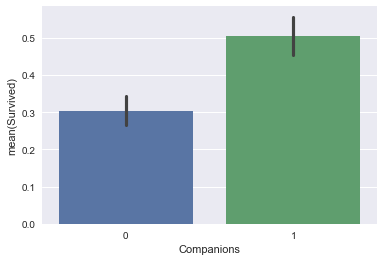

In [38]:
train["Companions"]=train["SibSp"]+train["Parch"]
train["Companions"].loc[(train["Companions"])>0]=1
train["Companions"].loc[(train["Companions"])==0]=0
test["Companions"]=test["SibSp"]+test["Parch"]
test["Companions"].loc[(test["Companions"])>0]=1
test["Companions"].loc[(test["Companions"])==0]=0
sns.barplot(x='Companions', y="Survived",data=train,)

In [39]:
train=train.drop(["SibSp","Parch"],axis=1)
test=test.drop(["SibSp","Parch"],axis=1)
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Companions
0,0,3,0,2.0,0.0,0,3,1
1,1,1,1,3.0,3.0,1,4,1
2,1,3,1,2.0,0.0,0,2,0
3,1,1,1,3.0,3.0,0,4,1
4,0,3,0,3.0,0.0,0,3,0


In [40]:
X_train = train.drop("Survived", axis=1)
Y_train = train["Survived"]
X_test  = test.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 7), (891,), (418, 7))

In [41]:
from sklearn.linear_model import LinearRegression
# Sklearn also has a helper that makes it easy to do cross validation
from sklearn.cross_validation import KFold
predictors = ["Pclass", "Sex", "Age","Companions", "Fare",
              "Embarked", "Title",]
target="Survived"
# Initialize our algorithm class
alg = LinearRegression()

# Generate cross validation folds for the titanic dataset.  It return the row indices corresponding to train and test.
# We set random_state to ensure we get the same splits every time we run this.
kf = KFold(test.shape[0], n_folds=3, random_state=1)

predictions = []

/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [42]:
gaussian = GaussianNB()

gaussian.fit(X_train, Y_train)

Y_pred = gaussian.predict(X_test)

gaussian.score(X_train, Y_train)

0.76879910213243552

In [43]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

78.900000000000006

In [44]:
#decision_tree = DecisionTreeClassifier()
#decision_tree.fit(X_train, Y_train)
#Y_pred = decision_tree.predict(X_test)
#acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
#acc_decision_tree

In [45]:
rf = RandomForestClassifier(n_estimators=100)

rf.fit(X_train, Y_train)

Y_pred = rf.predict(X_test)

rf.score(X_train, Y_train)

0.87205387205387208

In [46]:
logreg = LogisticRegression()

logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

logreg.score(X_train, Y_train)

0.78900112233445563

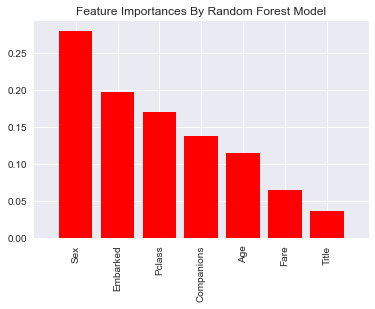

In [47]:
importances=rf.feature_importances_
std = np.std([rf.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
sorted_important_features=[]
for i in indices:
    sorted_important_features.append(predictors[i])
#predictors=titanic.columns
plt.figure()
plt.title("Feature Importances By Random Forest Model")
plt.bar(range(np.size(predictors)), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(np.size(predictors)), sorted_important_features, rotation='vertical')

plt.xlim([-1, np.size(predictors)]);

In [48]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": Y_pred
    })

In [49]:
submission.to_csv("submission.csv",sep=',',index=False)